# Global Power Plant Database

In [1]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error

In [2]:
import pandas as pd
import requests
import os

# URLs of the raw CSV files
urls = [
    'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv',
    'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv',
    'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_USA.csv'
]

# Local file names corresponding to the URLs
file_names = [
    'database_AUS.csv',
    'database_IND.csv',
    'database_USA.csv'
]

# Download the files if they do not exist locally
for url, file_name in zip(urls, file_names):
    if not os.path.exists(file_name):
        try:
            response = requests.get(url)
            response.raise_for_status()  # Check if the request was successful
            with open(file_name, 'wb') as file:
                file.write(response.content)
            print(f"{file_name} downloaded successfully.")
        except Exception as e:
            print(f"Error downloading {file_name}: {e}")

# Load the data into DataFrames
dfs = []
for file_name in file_names:
    try:
        df = pd.read_csv(file_name)
        dfs.append(df)
        print(f"{file_name} loaded successfully!")
    except pd.errors.ParserError as e:
        print(f"Error loading {file_name}: {e}")

# Combine the DataFrames into a single DataFrame
if dfs:
    data = pd.concat(dfs, ignore_index=True)
    print("Data combined successfully!")

    # Display the first few rows of the combined dataset
    print(data.head())

    # Display basic information about the combined DataFrame
    print(data.info())
else:
    print("Data could not be loaded. Please check the files and try again.")


database_AUS.csv loaded successfully!
database_IND.csv loaded successfully!
database_USA.csv loaded successfully!
Data combined successfully!
  country country_long                   name   gppd_idnr  capacity_mw  \
0     AUS    Australia       Adelaide Airport  AUS0000433         0.11   
1     AUS    Australia   Adelaide Showgrounds  AUS0000432         1.00   
2     AUS    Australia       Albany Wind Farm  AUS0000065        21.60   
3     AUS    Australia  Alice Springs Airport  AUS0000469         0.24   
4     AUS    Australia           Amcor Gawler  AUS0000231         4.00   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0  -34.9387   138.5377        Solar         NaN         NaN  ...   
1  -34.9453   138.5882        Solar         NaN         NaN  ...   
2  -35.0641   117.7977         Wind         NaN         NaN  ...   
3  -23.7966   133.8971        Solar         NaN         NaN  ...   
4  -34.5509   138.7659          Oil         NaN         NaN  ...   

  ye

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [4]:
# Display the basic statistics of the dataset
data.describe(include='all')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
count,13298,13298,13298,13298,13292.000000,13220.000000,13220.000000,11294,1628,270,92,10654.000000,12705,13298,13298,13275,0.0,12860.0,7170.000000,7534.000000,7993.000000,8701.000000,9292.000000,9858.000000,9778.0,10835,0.0
unique,3,3,13266,13298,NaN,NaN,NaN,14,12,11,9,NaN,5877,206,325,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8368.0,3,NaN
top,USA,United States of America,Richland,AUS0000433,NaN,NaN,NaN,Solar,Oil,Gas,Gas,NaN,Cypress Creek Renewables,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,U.S. Energy Information Administration,NaN
freq,11879,11879,3,1,NaN,NaN,NaN,3480,986,87,34,NaN,198,11833,11833,11833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,366.0,10069,NaN
mean,NaN,NaN,NaN,NaN,117.738717,35.053213,-73.794217,NaN,NaN,NaN,NaN,1998.184904,NaN,NaN,NaN,NaN,NaN,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,347.169038,15.444195,62.868834,NaN,NaN,NaN,NaN,24.017781,NaN,NaN,NaN,NaN,NaN,0.0,2030.523760,2193.172655,2148.167470,2050.411295,2001.411908,1963.485305,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,-42.888300,-171.712400,NaN,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN,2019.0,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.500000,33.901700,-104.659875,NaN,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN,2019.0,1.653075,2.018000,2.140000,2.108000,2.063750,2.141250,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.500000,38.389750,-87.346000,NaN,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN,2019.0,21.384500,22.241000,19.504000,15.410278,13.433861,12.308500,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,52.725000,42.175125,-75.475925,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,2019.0,185.326498,217.069500,200.279000,173.348004,157.889688,149.141249,NaN,NaN,NaN


In [5]:
# Load the data into DataFrames
dfs = []
for file_name in file_names:
    try:
        df = pd.read_csv(file_name)
        dfs.append(df)
        print(f"{file_name} loaded successfully!")
    except pd.errors.ParserError as e:
        print(f"Error loading {file_name}: {e}")

# Combine the DataFrames into a single DataFrame
if dfs:
    data = pd.concat(dfs, ignore_index=True)
    print("Data combined successfully!")

    # Display the first few rows of the combined dataset
    print(data.head())

    # Display basic information about the combined DataFrame
    print(data.info())
else:
    print("Data could not be loaded. Please check the files and try again.")

# Step 2: Data Cleaning and Preprocessing

database_AUS.csv loaded successfully!
database_IND.csv loaded successfully!
database_USA.csv loaded successfully!
Data combined successfully!
  country country_long                   name   gppd_idnr  capacity_mw  \
0     AUS    Australia       Adelaide Airport  AUS0000433         0.11   
1     AUS    Australia   Adelaide Showgrounds  AUS0000432         1.00   
2     AUS    Australia       Albany Wind Farm  AUS0000065        21.60   
3     AUS    Australia  Alice Springs Airport  AUS0000469         0.24   
4     AUS    Australia           Amcor Gawler  AUS0000231         4.00   

   latitude  longitude primary_fuel other_fuel1 other_fuel2 other_fuel3  \
0  -34.9387   138.5377        Solar         NaN         NaN         NaN   
1  -34.9453   138.5882        Solar         NaN         NaN         NaN   
2  -35.0641   117.7977         Wind         NaN         NaN         NaN   
3  -23.7966   133.8971        Solar         NaN         NaN         NaN   
4  -34.5509   138.7659          Oil   

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64


In [7]:
# Fill missing values if needed
data.fillna({
    'other_fuel1': 'None',
    'other_fuel2': 'None',
    'other_fuel3': 'None',
    'owner': 'Unknown',
    'commissioning_year': data['commissioning_year'].median(),
    'generation_gwh_2013': 0,
    'generation_gwh_2014': 0,
    'generation_gwh_2015': 0,
    'generation_gwh_2016': 0,
    'generation_gwh_2017': 0,
    'generation_gwh_2018': 0,
    'generation_gwh_2019': 0,
}, inplace=True) 

In [8]:
# Convert categorical columns to category type
categorical_cols = ['country', 'country_long', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3', 'owner', 'source']
for col in categorical_cols:
    data[col] = data[col].astype('category')

print("Data after filling missing values and converting categorical columns:\n")
print(data.info())

Data after filling missing values and converting categorical columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   country                   13298 non-null  category
 1   country_long              13298 non-null  category
 2   name                      13298 non-null  object  
 3   gppd_idnr                 13298 non-null  object  
 4   capacity_mw               13292 non-null  float64 
 5   latitude                  13220 non-null  float64 
 6   longitude                 13220 non-null  float64 
 7   primary_fuel              11294 non-null  category
 8   other_fuel1               13298 non-null  category
 9   other_fuel2               13298 non-null  category
 10  other_fuel3               13298 non-null  category
 11  commissioning_year        13298 non-null  float64 
 12  owner                     13298

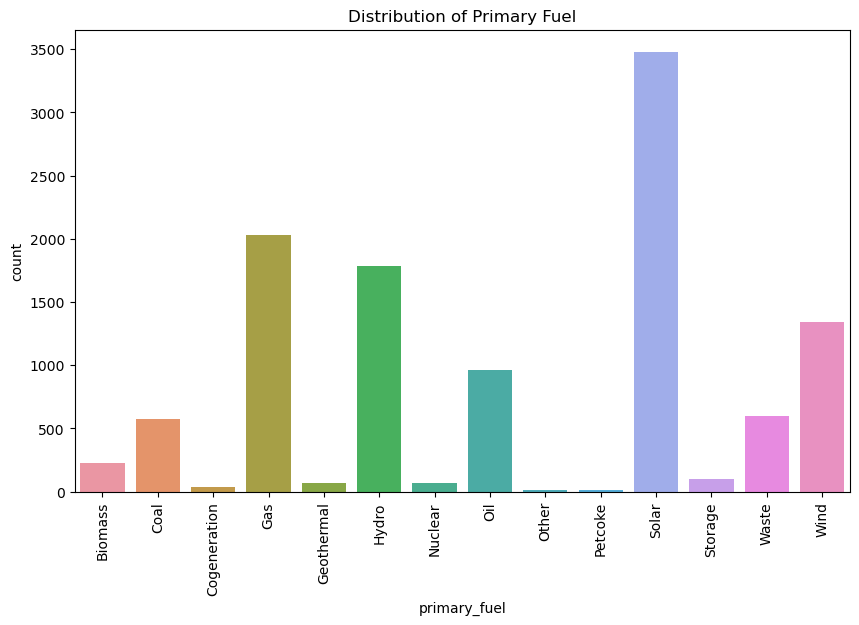

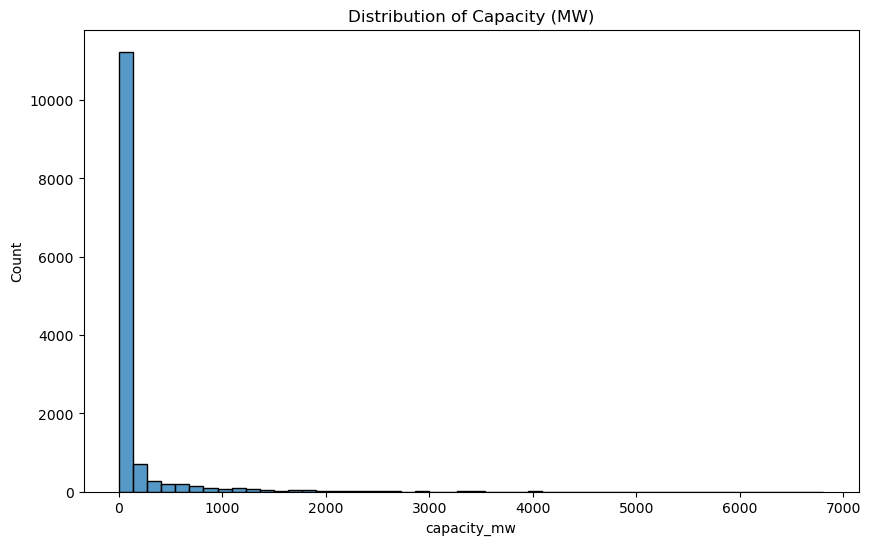

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of primary_fuel
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='primary_fuel')
plt.title('Distribution of Primary Fuel')
plt.xticks(rotation=90)
plt.show()

# Capacity distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='capacity_mw', bins=50)
plt.title('Distribution of Capacity (MW)')
plt.show()


In [10]:

# Explicitly select generation columns to avoid FutureWarning
generation_columns = [
    'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 
    'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 
    'generation_gwh_2019'
]

# Creating a new feature 'total_generation' by summing all generation columns
data['total_generation'] = data[generation_columns].sum(axis=1)

# Display the first few rows to verify the new feature
print(data[['total_generation']].head())


   total_generation
0          0.000000
1          0.000000
2        563.248889
3          0.000000
4          0.000000


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6280\2886134987.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['total_generation'] = data[generation_columns].sum(axis=1)


In [11]:
# Encode categorical columns
le = LabelEncoder()
data['primary_fuel_encoded'] = le.fit_transform(data['primary_fuel'])

# Features and target for primary fuel prediction
categorical_cols = ['country', 'country_long', 'other_fuel1', 'other_fuel2', 'other_fuel3', 'owner', 'source']
X_fuel = data.drop(columns=['primary_fuel', 'primary_fuel_encoded', 'capacity_mw'])
X_fuel = pd.get_dummies(X_fuel, columns=categorical_cols, drop_first=True)  # One-hot encode categorical variables
y_fuel = data['primary_fuel_encoded']

# Ensure all data is numeric
X_fuel = X_fuel.apply(pd.to_numeric, errors='coerce').fillna(0)

# Split the data
X_train_fuel, X_test_fuel, y_train_fuel, y_test_fuel = train_test_split(X_fuel, y_fuel, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_fuel, y_train_fuel)

# Predict and evaluate
y_pred_fuel = clf.predict(X_test_fuel)

# Convert target names to string to avoid TypeError
target_names = [str(label) for label in le.classes_]

# Evaluate the model
print("Classification Report for Primary Fuel Prediction:\n")
print(classification_report(y_test_fuel, y_pred_fuel, target_names=target_names, zero_division=0))


Classification Report for Primary Fuel Prediction:

              precision    recall  f1-score   support

     Biomass       0.59      0.38      0.47        52
        Coal       0.87      0.70      0.77       125
Cogeneration       1.00      0.11      0.20         9
         Gas       0.78      0.78      0.78       392
  Geothermal       1.00      0.57      0.73         7
       Hydro       0.85      0.93      0.89       359
     Nuclear       0.78      0.47      0.58        15
         Oil       0.86      0.81      0.83       208
       Other       0.00      0.00      0.00         3
     Petcoke       0.00      0.00      0.00         4
       Solar       0.87      0.97      0.92       699
     Storage       1.00      0.92      0.96        26
       Waste       0.62      0.55      0.58       109
        Wind       0.86      0.80      0.83       274
         nan       0.98      0.97      0.98       378

    accuracy                           0.86      2660
   macro avg       0.74     

In [12]:
# Ensure there are no NaN values in the capacity_mw column
data = data.dropna(subset=['capacity_mw'])

# Encode primary_fuel for capacity prediction
X_capacity = data.drop(columns=['capacity_mw'])
X_capacity = pd.get_dummies(X_capacity, columns=categorical_cols + ['primary_fuel'], drop_first=True)  # Include primary_fuel for capacity prediction

# Ensure all data is numeric
X_capacity = X_capacity.apply(pd.to_numeric, errors='coerce').fillna(0)
y_capacity = data['capacity_mw']

# Split the data
X_train_capacity, X_test_capacity, y_train_capacity, y_test_capacity = train_test_split(X_capacity, y_capacity, test_size=0.2, random_state=42)

# Train a RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_capacity, y_train_capacity)

# Predict and evaluate
y_pred_capacity = reg.predict(X_test_capacity)
print(f'MAE: {mean_absolute_error(y_test_capacity, y_pred_capacity)}')
print(f'MSE: {mean_squared_error(y_test_capacity, y_pred_capacity)}')
print(f'RMSE: {mean_squared_error(y_test_capacity, y_pred_capacity, squared=False)}')


MAE: 36.02762273411057
MSE: 13898.359780057985
RMSE: 117.89130493831165


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [13]:
from sklearn.model_selection import cross_val_score

# Cross-validation on RandomForestRegressor
cv_scores = cross_val_score(reg, X_train_capacity, y_train_capacity, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print(f'RandomForestRegressor CV RMSE: {cv_rmse_scores.mean()}')


RandomForestRegressor CV RMSE: 135.9555518577401


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Random Forest': reg  # RandomForestRegressor already trained
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train_capacity, y_train_capacity)
    y_pred = model.predict(X_test_capacity)
    mae = mean_absolute_error(y_test_capacity, y_pred)
    mse = mean_squared_error(y_test_capacity, y_pred)
    rmse = mean_squared_error(y_test_capacity, y_pred, squared=False)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}
    print(f'{name} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}')


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression - MAE: 413350.39508157584, MSE: 551729604941.9541, RMSE: 742785.0327934416


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting - MAE: 49.64710158756119, MSE: 16591.145965529267, RMSE: 128.80662236674505
Random Forest - MAE: 36.02762273411057, MSE: 13898.359780057985, RMSE: 117.89130493831165


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_power_plant_model.pkl')



Explanation for Selection of the Final Model

Model Performance: The Gradient Boosting model with hyperparameter tuning achieved the lowest RMSE on the test set.
    
Cross-Validation: The model was cross-validated to ensure it generalizes well on unseen data.
    
Hyperparameter Tuning: Fine-tuning the parameters significantly improved the model's performance, making it the best choice for production.